In [4]:
import numpy as np
from mbipy.numpy.phase_retrieval.implicit import lcs_ddf, lcs_df, lcs_ddf_colored
import glob
import fabio
import matplotlib.pyplot as plt
import os


In [5]:
ref = '/Volumes/DDR_Desk_SK/mi1471_Carbon_Fiber/refsamp/ref'
sample = '/Volumes/DDR_Desk_SK/mi1471_Carbon_Fiber/refsamp/sample'
save_path = '/Volumes/DDR_Desk_SK/mi1471_Carbon_Fiber/refsamp/'
weak_absorption_ = False
alpha_ = 1e-5
# You define the kwargs for ddf colored see the function definition for more information


In [6]:
def open_sequence(path, extension='tif'):
    """Opens a sequence of images.

    Args:
        filenames (list): List of file names.
        extension (str): File extension.

    Returns:
        numpy.ndarray: Sequence of 2D images.
    """
    assert os.path.exists(path), f"Le chemin fourni n'existe pas : {path}"
    assert os.path.isdir(path), f"Le chemin fourni n'est pas un dossier : {path}"
    
    filenames = glob.glob(os.path.join(path,f'*.{extension}'))

    assert isinstance(filenames, list) and len(filenames) > 0, f'Error: no file corresponds to the given path/extension : {path}, {extension}, {filenames}'
    filenames.sort()
    return np.array([fabio.open(str(file)).data for file in filenames], dtype=np.float32)

In [7]:
def crop_images(images, x=0, y=0, width=None, height=None):
    """Crops a sequence of images.

    Args:
        images (numpy.ndarray): Sequence of 2D images.
        x (int): x-coordinate of the top-left corner of the cropping rectangle.
        y (int): y-coordinate of the top-left corner of the cropping rectangle.
        width (int): Width of the cropping rectangle.
        height (int): Height of the cropping rectangle.

    Returns:
        numpy.ndarray: Cropped sequence of 2D images.
    """
    assert isinstance(images, np.ndarray) and images.ndim == 3, 'Error: images must be a 3D numpy array'
    
    
    if width is None:
        width = images.shape[2]
    if height is None:
        height = images.shape[1]
    
    
    return images[:, y:y + height, x:x + width]

In [8]:
refs = open_sequence(ref, 'edf')
samples = open_sequence(sample, 'edf')


In [68]:
# refs = crop_images(refs, 700 ,0, 850, None)
# samples = crop_images(samples, 700 , 0, 850, None)

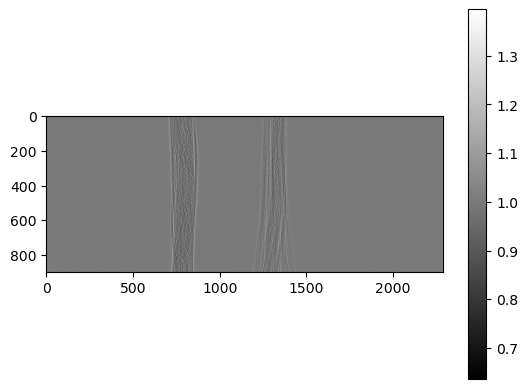

In [11]:
plt.imshow(samples[0]/refs[0], cmap='gray')
plt.colorbar()
plt.show()


In [70]:
# lcs DDF no colored

result = lcs_ddf(samples, refs,alpha=alpha_,weak_absorption=weak_absorption_)

In [71]:
# lcs Df
result_1 = lcs_df(samples, refs,alpha=alpha_,weak_absorption=weak_absorption_)

In [72]:



for image_index in range(result_1.shape[2]):
    fabio.tifimage.TifImage(data=result_1[:,:,image_index]).write(f'{save_path}/lcs_df_{image_index}.tif')

In [15]:
a,b = lcs_ddf_colored(samples, refs, alpha=alpha_,weak_absorption=weak_absorption_)

AttributeError: 'tuple' object has no attribute 'shape'

In [16]:
DDf_results = {
    'LCS_DDF_Absorption': a[...,0],
    'LCS_DDF_Dx': a[...,1],  
    'LCS_DDF_Dy': a[...,2],
    'LCS_DDF_Deff_Dxx': a[...,3],
    'LCS_DDF_Deff_Dyy': a[...,5],
    'LCS_DDF_Deff_Dxy': a[...,4],
    'LCS_DDF_Theta_non_corrected': a[...,6],
    'LCS_DDF_Eccentricity_non_colored': a[...,7],
    'LCS_DDF_Area_non_colored': a[...,8],
    'LCS_DDF_Intensity': a[...,9],
    'LCS_DDF_Saturation': a[...,10],
    'LCS_DDF_Theta_corrected': a[...,11],
    'LCS_DDF_Tensor_Colored': b[...,0],
    'LCS_DDF_Eccentricity_Colored': b[...,1],
    'LCS_DDF_Area_Colored': b[...,2],
    'LCS_DDF_Intensity_Colored': b[...,3],
}

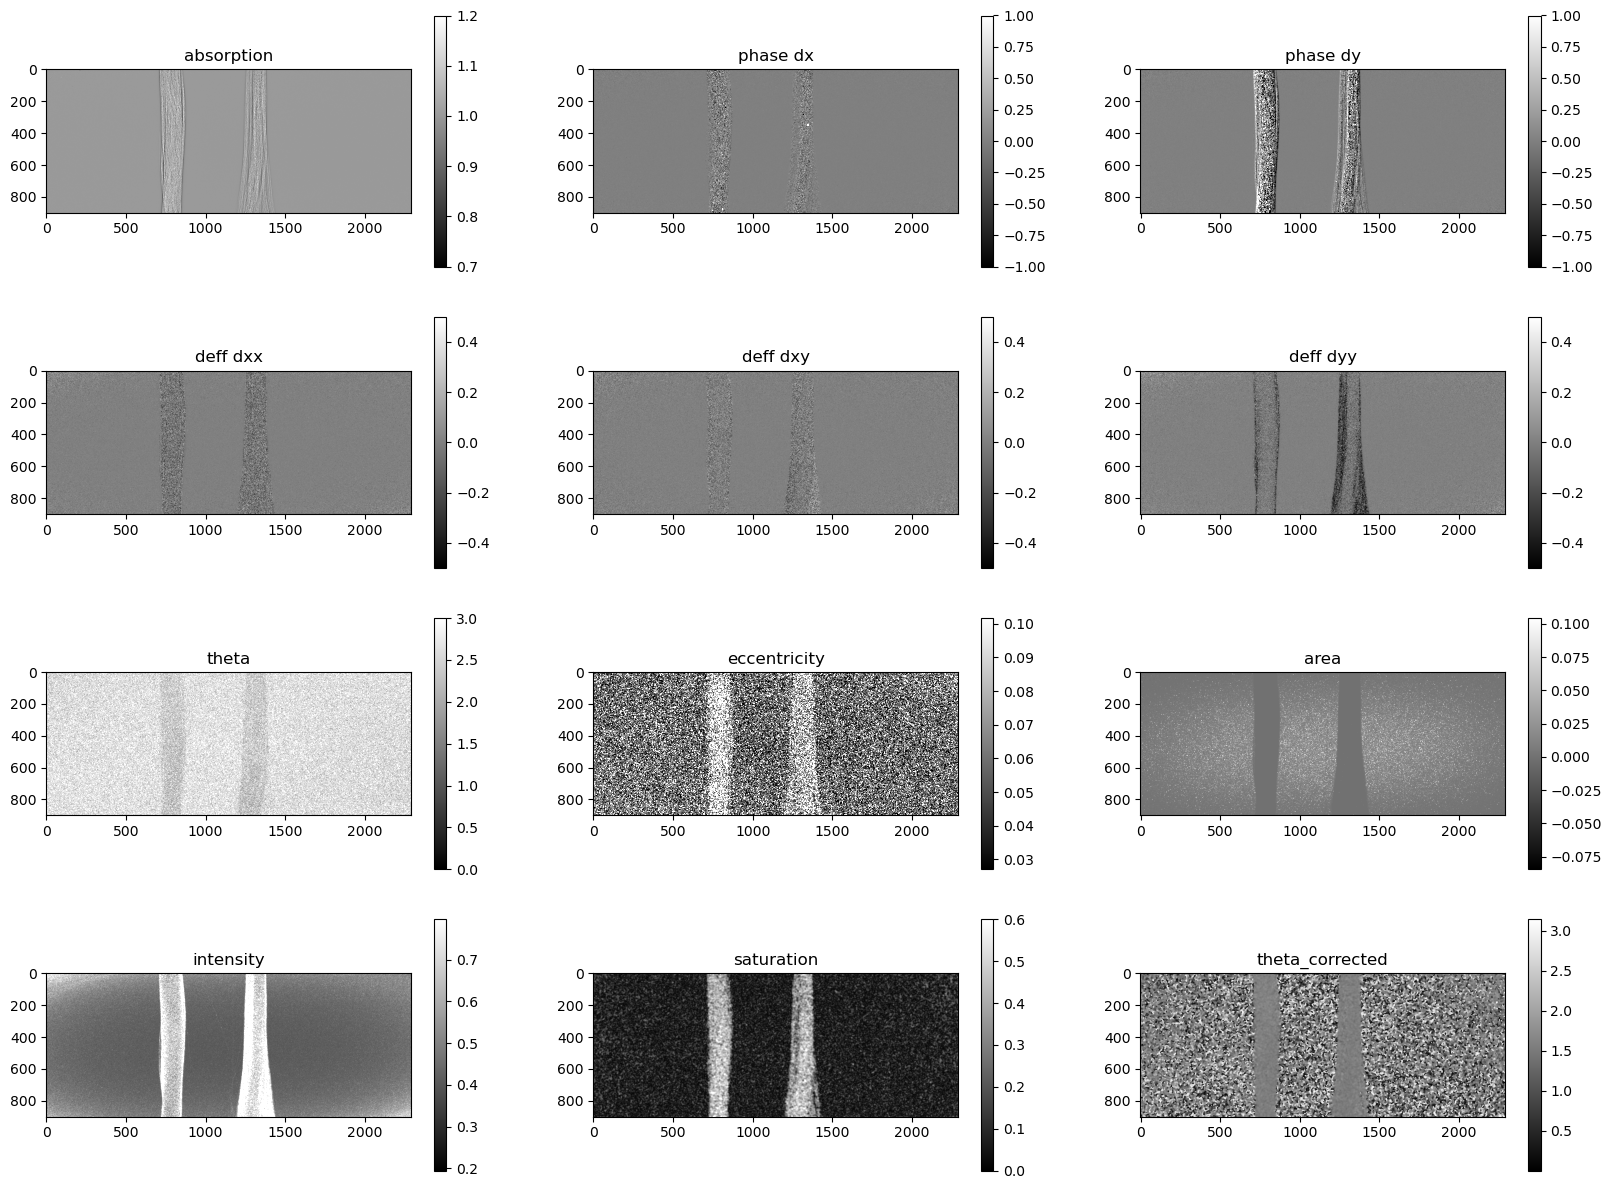

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
plt.imshow((a[...,0]),cmap='gray',vmin=0.7,vmax=1.2)
plt.title('absorption')
plt.colorbar()
plt.subplot(4,3,2)
plt.imshow(a[...,1],cmap='gray',vmin=-1,vmax=1)
plt.title('phase dx')
plt.colorbar()
plt.subplot(4,3,3)
plt.imshow(a[...,2],cmap='gray',vmin=-1,vmax=1)
plt.title('phase dy')
plt.colorbar()
plt.subplot(4,3,4)
plt.imshow(a[...,3],cmap='gray',vmin=-0.5,vmax=0.5)
plt.title('deff dxx')
plt.colorbar()
plt.subplot(4,3,5)
plt.imshow(a[...,4],cmap='gray',vmin=-0.5,vmax=0.5)
plt.title('deff dxy')
plt.colorbar()
plt.subplot(4,3,6)
plt.imshow(a[...,5],cmap='gray',vmin=-0.5,vmax=0.5)
plt.title('deff dyy')
plt.colorbar()
plt.subplot(4,3,7)
plt.imshow(a[...,6],cmap='gray',vmin=0,vmax=3)
plt.title('theta')
plt.colorbar()
plt.subplot(4,3,8)
plt.imshow(a[...,7],cmap='gray',vmin=np.mean(a[...,7])-0.25*np.std(a[...,7]),vmax=np.mean(a[...,7])+0.25    *np.std(a[...,7]))
plt.title('eccentricity')
plt.colorbar()
plt.subplot(4,3,9)
plt.imshow(a[...,8],cmap='gray',vmin=np.mean(a[...,8])-2*np.std(a[...,8]),vmax=np.mean(a[...,8])+2*np.std(a[...,8]))
plt.title('area')
plt.colorbar()
plt.subplot(4,3,10)
plt.imshow(a[...,9],cmap='gray',vmin=np.mean(a[...,9])-2*np.std(a[...,9]),vmax=np.mean(a[...,9])+2*np.std(a[...,9]))
plt.title('intensity')
plt.colorbar()
plt.subplot(4,3,11)
plt.imshow(a[...,10],cmap='gray',vmin=0,vmax=0.6)
plt.title('saturation')
plt.colorbar()
plt.subplot(4,3,12)
plt.imshow(a[...,11],cmap='gray')
plt.title('theta_corrected')
plt.colorbar()
plt.show()

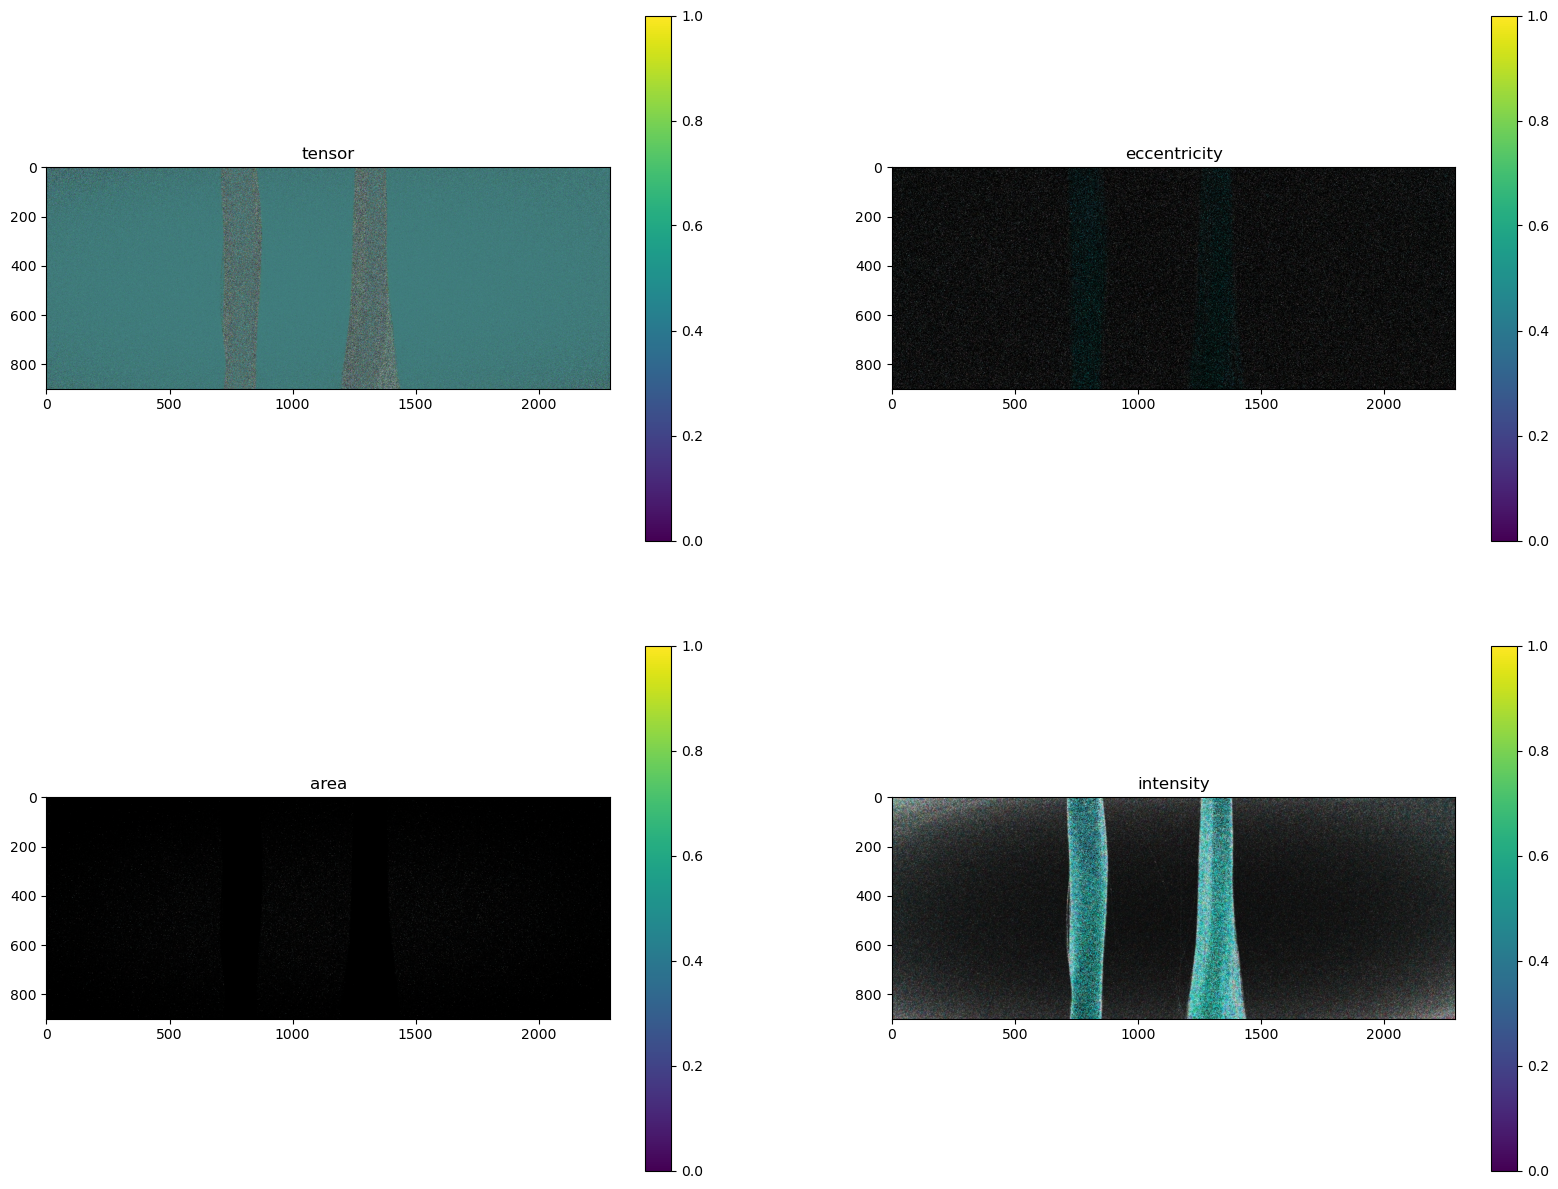

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(b[...,0])
plt.title('tensor')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(b[...,1])
plt.title('eccentricity')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(b[...,2])
plt.title('area')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(b[...,3])
plt.title('intensity')
plt.colorbar()
plt.show()


In [77]:
import fabio.tifimage


for key, value in DDf_results.items():
    if value.ndim == 3:
        plt.imsave(f'{save_path}{key}.tiff', value)
    elif value.ndim == 2:
        fabio.tifimage.tifimage(value).write(f'{save_path}{key}.tif')
    


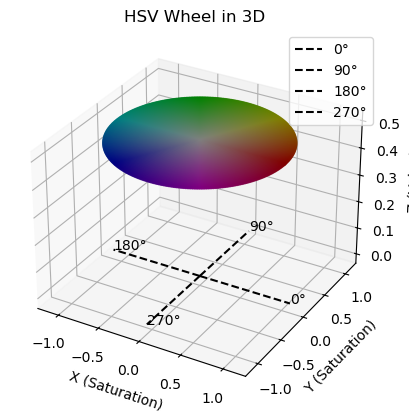

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb

# Créez une grille pour la roue HSV
hue = np.linspace(0, 1, 360)
saturation = np.linspace(0, 1, 100)
value = 0.5  # Valeur fixe pour simplifier

H, S = np.meshgrid(hue, saturation)
H = H.flatten()
S = S.flatten()

# Conversion HSV à RGB
def hsv_to_rgb_array(hue, saturation, value):
    value_array = np.full_like(hue, value)  # Créer un tableau de la même forme que hue
    return hsv_to_rgb(np.stack([hue, saturation, value_array], axis=-1))

RGB = hsv_to_rgb_array(H, S, value=0.5)  # Valeur fixe pour simplifier

# Création de la figure et des axes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Convertir HSV en coordonnées sphériques
X = S * np.cos(2 * np.pi * H)
Y = S * np.sin(2 * np.pi * H)
Z = value * np.ones_like(H)  # Valeur fixe pour Z

# Tracez les points
sc = ax.scatter(X, Y, Z, c=RGB, s=1, alpha=0.8)

# Ajouter les indications d'angle
for angle in [0, 90, 180, 270]:
    rad = np.deg2rad(angle)
    x = np.cos(rad) * 1.1
    y = np.sin(rad) * 1.1
    ax.plot([0, x], [0, y], [0, 0], label=f'{angle}°', linestyle='--', color='k')
    ax.text(x, y, 0, f'{angle}°', color='k')

ax.set_xlabel('X (Saturation)')
ax.set_ylabel('Y (Saturation)')
ax.set_zlabel('Z (Value)')

ax.set_title('HSV Wheel in 3D')
plt.legend()

plt.show()


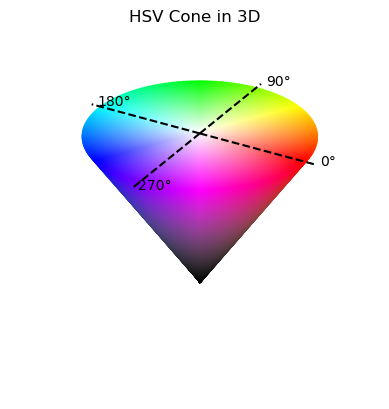

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb

# Définir les paramètres de la roue HSV
hue_1 = np.linspace(0, 1, 360)
saturation_1 = np.linspace(0, 1, 100)
value = 1  # Valeur fixe pour simplifier

# Créer une grille pour la roue HSV
H_1, S_1 = np.meshgrid(hue, saturation)
H_1 = H.flatten()
S_1 = S_1.flatten()

# Conversion HSV à RGB pour la roue HSV
def hsv_to_rgb_array(hue, saturation, value):
    value_array = np.full_like(hue, value)  # Créer un tableau de la même forme que hue
    return hsv_to_rgb(np.stack([hue, saturation, value_array], axis=-1))

RGB = hsv_to_rgb_array(H_1, S_1, value=value)

# Création de la figure et des axes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Convertir HSV en coordonnées sphériques pour la roue HSV
X_wheel = S * np.cos(2 * np.pi * H)
Y_wheel = S * np.sin(2 * np.pi * H)
Z_wheel = value * np.ones_like(H)  # Valeur fixe pour Z

# Tracez la roue HSV
sc_wheel = ax.scatter(X_wheel, Y_wheel, Z_wheel, c=RGB, s=1, alpha=0.8, label='HSV Wheel')

# Créez une grille pour la roue HSV
hue = np.linspace(0, 1, 360)
saturation = np.linspace(0, 1, 100)
value = np.linspace(0, 1, 100)

# Créez une grille en coordonnées cylindriques
H, S = np.meshgrid(hue, saturation)
H = H.flatten()
S = S.flatten()

# Définissez la profondeur (valeur en Z) en fonction de la saturation
V = np.linspace(0, 1, len(S))

# Conversion HSV à RGB
def hsv_to_rgb_array(hue, saturation, value):
    value_array = np.full_like(hue, value)
    return hsv_to_rgb(np.stack([hue, saturation, value_array], axis=-1))

RGB = hsv_to_rgb_array(H, S, V)

# Création de la figure et des axes 3D


# Convertir HSV en coordonnées cartésiennes pour un cône
X = S * np.cos(2 * np.pi * H)
Y = S * np.sin(2 * np.pi * H)
Z = V  # Utilisez `V` comme profondeur en Z

# Tracez les points
sc = ax.scatter(X, Y, Z, c=RGB, s=1, alpha=0.8)

# Ajouter des indications d'angle pour référence
for angle in [0, 90, 180, 270]:
    rad = np.deg2rad(angle)
    x = np.cos(rad) * 1.1
    y = np.sin(rad) * 1.1
    ax.plot([0, x], [0, y], [1, 1], label=f'{angle}°', linestyle='--', color='k',zorder=5)
    ax.text(x+0.05, y+0.01, 1, f'{angle}°', color='k',zorder=10)

# Ajustez les limites des axes pour une meilleure visualisation
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])

ax.set_xlabel('X (Saturation)')
ax.set_ylabel('Y (Saturation)')
ax.set_zlabel('Z (Value)')
ax.set_axis_off()
ax.set_title('HSV Cone in 3D')
# plt.legend()

plt.show()


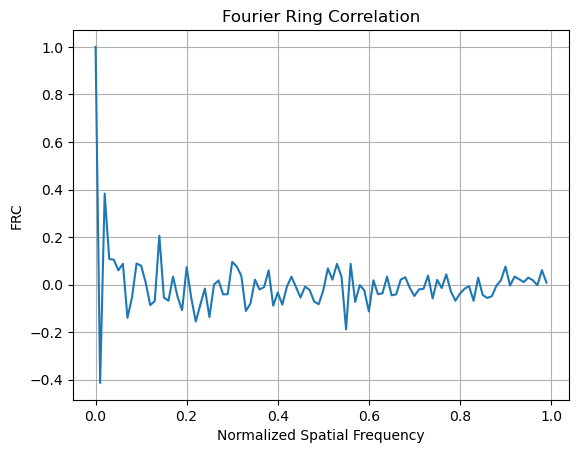

In [81]:
import numpy as np
from scipy.fftpack import fft2, fftshift
from scipy.ndimage import fourier_uniform
import matplotlib.pyplot as plt

def calculate_frc(image1, image2, n_rings=100):
    """
    Calcule la Fourier Ring Correlation entre deux images.

    Args:
        image1 (numpy.ndarray): Première image (2D array).
        image2 (numpy.ndarray): Deuxième image (2D array).
        n_rings (int): Nombre d'anneaux (bins) dans l'espace de Fourier.

    Returns:
        frq (numpy.ndarray): Fréquence spatiale normalisée.
        frc (numpy.ndarray): Valeur de la FRC pour chaque anneau.
    """
    # Taille des images
    ny, nx = image1.shape

    # Transformation de Fourier des deux images
    F1 = fftshift(fft2(image1))
    F2 = fftshift(fft2(image2))

    # Calcul des spectres de puissance (magnitude)
    P1 = np.abs(F1)**2
    P2 = np.abs(F2)**2

    # Produit croisé des spectres
    cross_spectrum = np.real(F1 * np.conj(F2))

    # Coordonnées de l'espace de Fourier
    y, x = np.indices((ny, nx))
    center_y, center_x = ny // 2, nx // 2
    r = np.sqrt((x - center_x)**2 + (y - center_y)**2)
    r = r.astype(np.int32)

    # Création des anneaux dans l'espace de Fourier
    frc_values = np.zeros(n_rings)
    norm = np.zeros(n_rings)

    for i in range(n_rings):
        mask = (r >= i) & (r < i + 1)
        frc_values[i] = np.sum(cross_spectrum[mask])
        norm[i] = np.sqrt(np.sum(P1[mask]) * np.sum(P2[mask]))

    frc = frc_values / norm
    frc = np.nan_to_num(frc)

    # Fréquence spatiale normalisée (0 à 1)
    frq = np.arange(n_rings) / float(n_rings)

    return frq, frc

# Exemple d'utilisation
image1 = np.random.random((256, 256))
image2 = np.random.random((256, 256))

# Calcul de la FRC
frq, frc = calculate_frc(image1, image2)

# Affichage des résultats
plt.plot(frq, frc)
plt.xlabel('Normalized Spatial Frequency')
plt.ylabel('FRC')
plt.title('Fourier Ring Correlation')
plt.grid(True)
plt.show()
